In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
cechowanie = pd.read_csv("cechowanie.csv")

umax = r"$U_{max}$ [V]"
pomiarmax = r"$U_{max}$ zmierzone [V]"
umin = r"$U_{min}$ [V]"
pomiarmin = r"$U_{min}$ zmierzone [V]"
zakresmax = r"Zakres $U_{max}$ [V]"
zakresmin = r"Zakres $U_{min}$ [V]"

cechowanie = cechowanie.rename(columns={r"Umax":umax,
                   r"pomiarmax": pomiarmax,
                   r"pomiarmin": pomiarmin,
                  "Umin": umin,
                  "zakresmax": zakresmax,
                  "zakresmin": zakresmin})
cechowanie

,$U_{max}$ [V],$U_{max}$ zmierzone [V],Zakres $U_{max}$ [V],$U_{min}$ [V],$U_{min}$ zmierzone [V],Zakres $U_{min}$ [V]
0,20.0,20.100,200,10.0,10.090,20
1,10.0,9.400,20,5.0,4.720,20
2,5.0,4.850,20,2.0,1.950,20
3,2.0,2.010,20,0.9,0.912,20
4,0.9,0.921,2,0.3,0.312,2


In [3]:
I = 59.5e-6
Rk = cechowanie[umax] / I
Rk

0    336134.453782
1    168067.226891
2     84033.613445
3     33613.445378
4     15126.050420
Name: $U_{max}$ [V], dtype: float64

In [14]:
r = r"R [$k\Omega$]"
rRe = pd.DataFrame([330,160,80,33,15])
tabela1 = pd.DataFrame({umax: cechowanie[umax], r : np.round(Rk/1e3).astype(int)})
tabela1

,$U_{max}$ [V],R [$k\Omega$]
0,20.0,336
1,10.0,168
2,5.0,84
3,2.0,34
4,0.9,15


In [61]:
URe = r"$U_{k}[V]$"
RC = r"$R_c[k\Omega]$"
RRe = rRe + 0.6
Uk = RRe*I
Uk

,0
0,19.635036
1,9.520036
2,4.760036
3,1.963536
4,0.892536


In [51]:
#Niepewności
DeltaR = 1.6
DeltaI = (I*0.005+1e-7)
DeltaI*1e6

0.3975

In [59]:
rRe = pd.DataFrame([330,160,80,33,15])
rRe = rRe*1e3
RRe = rRe+600
DeltaRC = rRe*0.05+1.6
DeltaU = np.sqrt((DeltaI*RRe)**2+(I*DeltaRC)**2)
DeltaU.round(3)
(59.5*(16.5+0.6))**2

1035204.5025000001

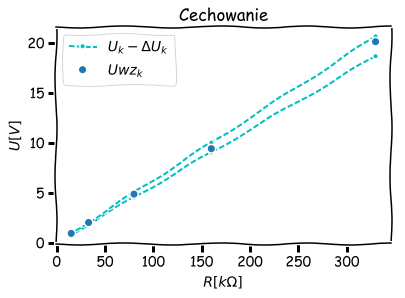

In [90]:
Udolne = Uk-DeltaU
Ugorne = Uk+DeltaU
cechowanie[pomiarmax]
R_plot = RRe*1e-3
# plt.plot(RRe,Uk,'.-')
# plt.xkcd()
plt.plot(R_plot,Udolne,'.--c',label=r'$U_k-\Delta U_k$')
plt.plot(R_plot,Ugorne,'.--c')
plt.plot(R_plot,cechowanie[pomiarmax],'o',label=r'$Uwz_k$')
plt.grid()
plt.title('Cechowanie')
plt.legend()
plt.xlabel(r'$R[k\Omega ]$')
plt.ylabel(r'$U[V]$')
# plt.savefig('Cechowanie.png')
# plt.savefig('Cechowanie.eps')

In [91]:
cechowanie[pomiarmax]*0.003+cechowanie[zakresmax]/2*1e-4

0    0.070300
1    0.029200
2    0.015550
3    0.007030
4    0.002863
dtype: float64